# Diagonal plot

In order to evaluate the predition of e.g. a machine learning or AI model, common metrics such as the mean absolute deviation (MAD) are often used. This and other metrics are a good indicator of the overall quality of the prediction, however, they don't indicate whether the prediction is unbiased or if parts of the prediction may have some issues.

One average one expects that the prediction reflects the later outcome. Due to statistical fluctuations, the best point estimator of a predicted probability density distribution will in general deviate from the later observed value, however, on average the relation should hold. This means that the visualisation of prediction (on the x-axis) and observed value (on the y-axis) should be aligned on the diagonal of the plot.

This is best visualized using a profile plot as a scatter-plot can be hard to interprete if a significant amount of data is used and the distributions have a sizeable volatility.


In [68]:
%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/home/kerzel/myenv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


This example uses a Poisson distribution to generate the true values (y) and adds some noise based on a Gaussian distribution to the prediction (yhat). This implies that there are no "real" predictions from a predictive model. Hence, the resulting diagonal plot should always be on the diagonal, however, artefacts from physical boundaries (e.g. the Poisson distribution itself cannot be negative, adding a sizeable amount of noice however may push the prediction yhat into negative numbers, etc) or other effects may result in deviations from the diagonal.

## Exercise
 *   Generate some test data with litte noise, e.g mean $\mu = 20$ and noise = 0.2
 *   Increase the noise level
 *   Shift the mean or use a different underlying probability distribution and observe how the diagonal plot changes.

In [69]:
# generate some toy "truth" and "prediction"
# assume perfect prediction, just some Gaussian noise.
def generate_test_data(mean, noise, n_samples):
    y    = np.random.poisson(mean, n_samples)
    yhat = y + norm.rvs(scale=noise, size=n_samples)
    
    return y, yhat

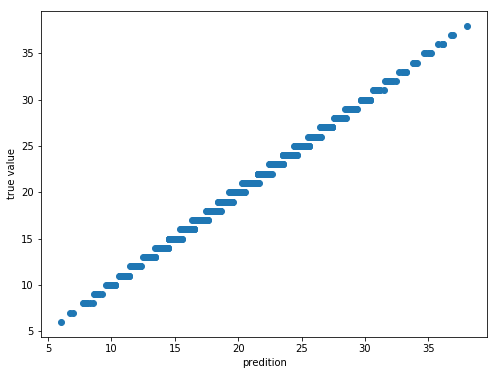

In [100]:
y, yhat = generate_test_data(mean=20, noise=0.2, n_samples=5000)

#show the toy samples, the predictions are on the x-axis, the true values on the y axis
plt.scatter(yhat,y)
plt.xlabel('predition')
plt.ylabel('true value')
plt.show()

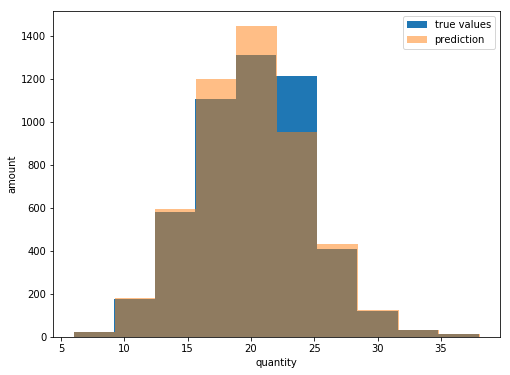

In [101]:
# now show the distribution of data in x and y 
plt.hist(y, label='true values')
plt.hist(yhat, alpha = 0.5, label='prediction')
plt.xlabel('quantity')
plt.ylabel('amount')
plt.legend()
plt.show()

          mean       sem
bin                     
2     7.000000  0.408248
3    10.380531  0.096000
4    13.937685  0.040428
5    17.681731  0.027834
6    21.389454  0.027922
7    25.199488  0.039458
8    28.841880  0.069473
9    33.000000  0.179969
10   36.222222  0.323942
1


/home/kerzel/myenv/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


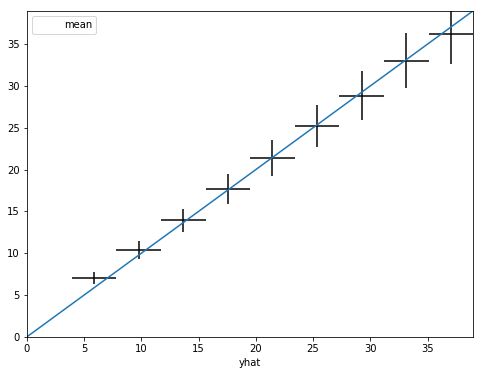

In [102]:
#
#generate a profile plot
#
# we use a fixed bin width, make sure the borders are covering the range of data in the predictions
border = max(abs(np.floor(min(yhat))),abs(np.ceil(max(yhat))))
x_min =   0
x_max =   border
n_bins = 10 

df = pd.DataFrame({'yhat': yhat, 'y': y})

# determine bins, +1 as we neeed the bin edge
bins = np.linspace(x_min, x_max, n_bins+1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]


df['bin'] = np.digitize(yhat, bins=bins)
binned = df.groupby('bin')

# calculate mean and standard error of the mean for true values in each bin
result = binned['y'].agg(['mean', 'sem'])
print(result)



#make sure that we have each a value in each bin and no NaNs
#result = result.fillna(0.0)

for i in range(1,n_bins+1):
    if i not in result.index:
        print(i)
        result.loc[i] = [NaN,NaN]
result = result.sort_index()

# calculate the y_err of each bin for the result
result['y_err'] = 1.0/len(result)*np.sqrt( (result['mean']**2))
result['yhat'] = bin_centers
result['yhat_err'] = bin_width / 2

result.plot(
    x='yhat',
    y='mean',
    xerr='yhat_err',
    yerr='y_err',
    linestyle='none',
    capsize=0,
    color='black',
)

#add a diagonalto guide the eye
x_space = np.linspace(x_min, x_max)
plt.plot(x_space, 1.0*x_space)
plt.ylim(0, border)
plt.xlim(0, border)
plt.show()

In case the statistics is very unevenly distributed in the bins, it's better to define bins such that there is a sufficient number of entries per bin, for example:


          mean       sem     y_err
bin                               
1     8.918919  0.174923  1.114865
2    11.293651  0.061791  1.411706
3    13.259786  0.040654  1.657473
4    15.124498  0.031800  1.890562
5    17.109643  0.025832  2.138705
6    19.047991  0.022965  2.380999
7    23.401469  0.051213  2.925184
8    32.164835  0.207470  4.020604


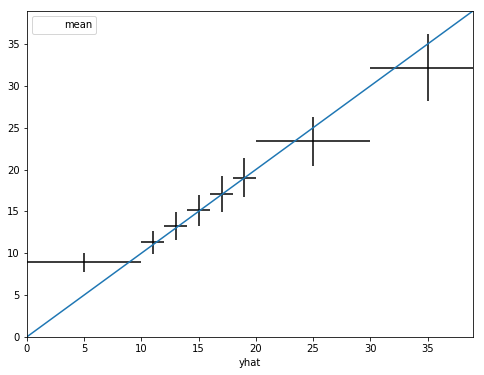

In [103]:
df = pd.DataFrame({'yhat': yhat, 'y': y})

bins = np.array([0.0, 10.0, 12.0 ,14.0 ,16.0 ,18.0 ,20.0 ,30.0,40])
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = []
for i in range(0,len(bins)-1):
    bin_width.append(0.5*(bins[i+1]-bins[i]))


df['bin'] = np.digitize(yhat, bins=bins)
binned = df.groupby('bin')

# calculate mean and standard error of the mean for true values in each bin
result = binned['y'].agg(['mean', 'sem'])

# calculate the y_err of each bin for the result
result['y_err'] = 1.0/len(result)*np.sqrt( (result['mean']**2))

#make sure that we have each a value in each bin and no NaNs
#result = result.fillna(0.0)


for i in range(1,n_bins+1):
    if i not in result.index:
        result2.loc[i] = [NaN,NaN]
result = result.sort_index()

result['yhat'] = bin_centers
result['yhat_err'] = bin_width

result.plot(
    x='yhat',
    y='mean',
    xerr='yhat_err',
    yerr='y_err',
    linestyle='none',
    capsize=0,
    color='black',
)

#add a diagonalto guide the eye
x_space = np.linspace(x_min, x_max)
plt.plot(x_space, 1.0*x_space)
plt.ylim(0, border)
plt.xlim(0, border)
plt.show()